### Regularization Model (Ridge, Lasso, Elastic-Net)

The Whole of the Objective/ Goal of the Regularization term is to minimize the Cost function in order to for the model to better fit the data

In [1]:
#Importing The Required Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

In [3]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

In [5]:
#Train Test split
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],boston_pd.iloc[:, -1],test_size=0.25,random_state=1)
#Getting the Shape of the Split
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

#### Normal Linear Regression Model

In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  21.89776539604942
    Columns  Coefficient Estimate
0      CRIM             -0.114429
1        ZN              0.057130
2     INDUS              0.038300
3      CHAS              2.428546
4       NOX            -21.232624
5        RM              2.877234
6       AGE              0.006911
7       DIS             -1.471583
8       RAD              0.305784
9       TAX             -0.010675
10  PTRATIO             -0.996138
11        B              0.006277
12    LSTAT             -0.557414


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

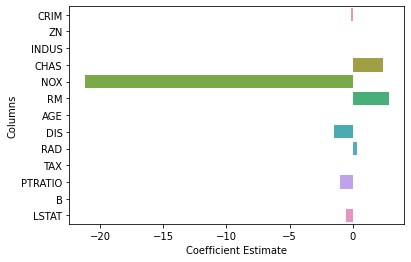

In [7]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

Inference: By Applying the Normal Linear Regression we got "Nox" columns as the Most Significant columns as its Coefficient value is -21.67

#### Ridge Regression
--> Applys L2 Regularization

--> Will Minimize the the Coefficients but wont make them Zero

--> Handled Multicollinearlity

In [8]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 0.5) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

21.446529090926646
    Columns  Coefficient Estimate
0      CRIM             -0.111089
1        ZN              0.057770
2     INDUS              0.009135
3      CHAS              2.274489
4       NOX            -14.891569
5        RM              2.941448
6       AGE              0.001579
7       DIS             -1.383351
8       RAD              0.293200
9       TAX             -0.011373
10  PTRATIO             -0.920654
11        B              0.006655
12    LSTAT             -0.564235


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

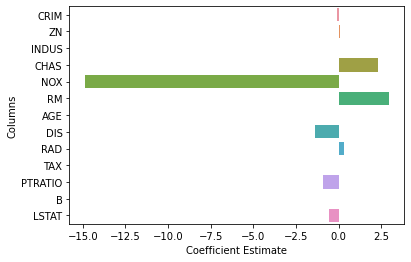

In [9]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

Inference: By Applying the Ridge Regression "Nox" columns coefficient Value is Decrease from -21.67 to -14, but the Ridge Regression Didnt make it to Zero

#### Lasso regression
--> Apply L1 Regularization

--> Makes the Cofficients Zero of the Leasts Important Features

--> Can be Used For Feature Selection

In [10]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = .1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 22.30493547526918
    Columns  Coefficient Estimate
0      CRIM             -0.102293
1        ZN              0.059429
2     INDUS             -0.045694
3      CHAS              0.717189
4       NOX             -0.000000
5        RM              2.849110
6       AGE             -0.006354
7       DIS             -1.123466
8       RAD              0.272811
9       TAX             -0.013672
10  PTRATIO             -0.756438
11        B              0.007564
12    LSTAT             -0.601854


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

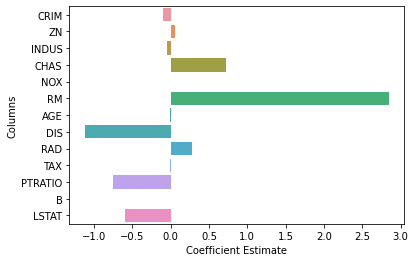

In [11]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

Inference: By Applying the lasso Regression, it made the least important Columns Coefficent to Zero, "NOX" was Insignificant so lasso made it Zero

#### Elastic Net
--> when r / l1_ratio = 0 then Ridge

--> when r / l1_ratio = 1 then Lasso

In [12]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = 0.01,l1_ratio=0.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 21.332260734080933


,Columns,Coefficient Estimate
0,CRIM,-0.107239
1,ZN,0.058642
2,INDUS,-0.024106
3,CHAS,1.982799
4,NOX,-7.484559
5,RM,2.978587
6,AGE,-0.004167
7,DIS,-1.277236
8,RAD,0.280077
9,TAX,-0.012269


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

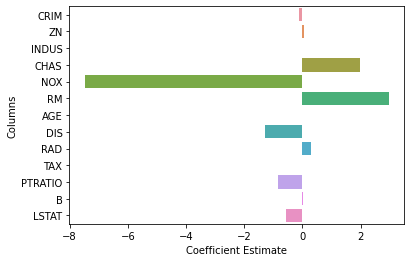

In [13]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)

Inference: In Elastic Net Did a combination of Both and brought down the MSE